In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
data_1 = pd.read_excel("Data1.xlsx")
data_2 = pd.read_excel("Data2.xlsx")

In [3]:
var1_d1 = data_1["Variable 1"]
var2_d1 = data_1["Variable 2"]
x_d1 = np.column_stack((var1_d1,var2_d1))
class_d1 = data_1["Class"]
var1_d2 = data_2["Variable 1"]
var2_d2 = data_2["Variable 2"]
x_d2 = np.column_stack((var1_d2,var2_d2))
class_d2 = data_2["Class"]

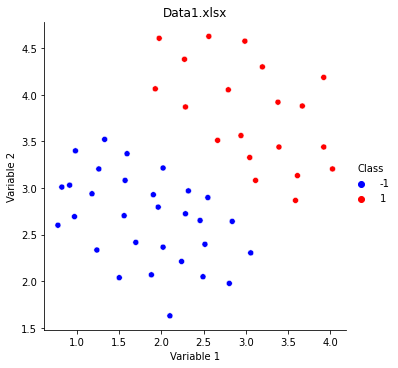

In [6]:
#Question 1
sns.relplot(x = var1_d1,y = var2_d1,hue = class_d1,palette=["b", "r"]).set(title = "Data1.xlsx")

Text(0.5, 1.0, 'SVM Classifier')

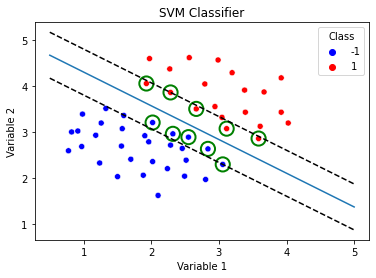

In [7]:
  # Question 2
from sklearn import svm
clf = svm.SVC(kernel = 'linear',C = 1.0)
clf.fit(x_d1,class_d1)
w = clf.coef_[0]
b = clf.intercept_[0]
sup = clf.support_vectors_
classifier_x = np.linspace(0.5,5,100)
classifier_y = -((w[0]/w[1])*classifier_x + b/w[1])
ya = -((w[0]/w[1])*classifier_x + (b-1)/w[1])
yb = -((w[0]/w[1])*classifier_x + (b+1)/w[1])
plt.plot(classifier_x,classifier_y)
plt.plot(classifier_x,ya,'k--')
plt.plot(classifier_x,yb,'k--')
plt.scatter(sup[:,0],sup[:,1],color = 'green',s=200, linewidth=2, facecolors='none')
sns.scatterplot( x = data_1['Variable 1'],  y = data_1['Variable 2'], hue = class_d1, palette=['b', 'r'])
plt.title("SVM Classifier")

Mean of Cluster 0 : [3.063565 3.800865]
Mean of Cluster 1 : [1.828335 2.67121 ]


[Text(0.5, 1.0, 'K-Means Classifier on Data1.xlsx')]

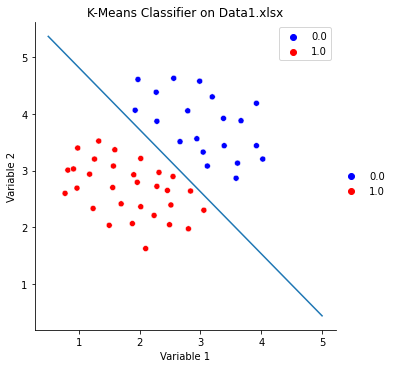

In [9]:
# K-Means Clustering
def closest_mean(x,means):
  k = means.shape[0]
  #class_map = np.zeros((x.shape[0],1),dtype=np.float64)
  class_map = np.ones(x.shape[0],dtype=np.float64)
  for i in range(x.shape[0]):
    class_map[i] = np.argmin(np.sqrt(np.sum(np.square(x[i] - means),axis = 1)))
  return class_map

def mean_point(x,class_map,k):
  dim = x.shape[1]
  mean = np.zeros((k,dim))
  for i in range(k):
    mean[i] = np.mean(x[class_map == i],axis=0)
  return mean 

k = 2 # We know we have to separate the points into 2 clusters
means = np.zeros((k,x_d1.shape[1]))
# Random Initialisation of the mean points
random_index = np.random.permutation(x_d1.shape[0])
means = x_d1[random_index[:2],:]

for i in range(10):
  map = closest_mean(x_d1,means)
  means = mean_point(x_d1,map,k)

# Plotting the data points
sns.relplot(x = var1_d1,y = var2_d1,hue = map,palette=["b", "r"])
print("Mean of Cluster 0 :",means[0])
print("Mean of Cluster 1 :",means[1])
x_coord = np.linspace(0.5,5,100)
slope = ((means[0][0]-means[1][0])/(means[1][1]-means[0][1]))
y_c = (means[0][1]+means[1][1])/2 + slope*(x_coord-((means[0][0]+means[1][0])/2))
sns.lineplot(x = x_coord, y = y_c, palette='g').set(title = "K-Means Classifier on Data1.xlsx")

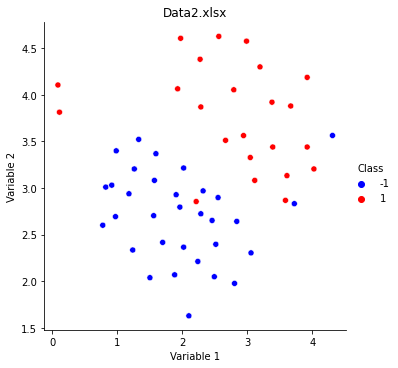

In [10]:
# Question 3
sns.relplot(x = var1_d2,y = var2_d2,hue = class_d2,palette=["b", "r"]).set(title="Data2.xlsx")

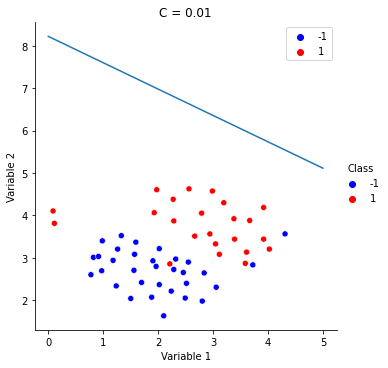

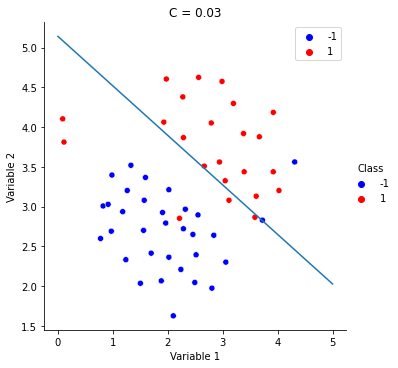

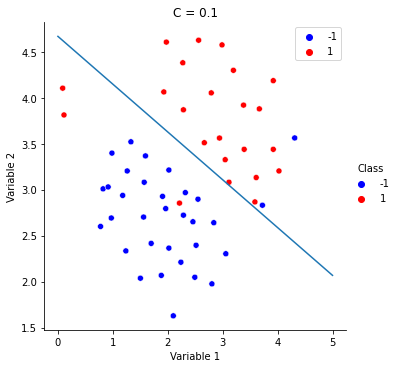

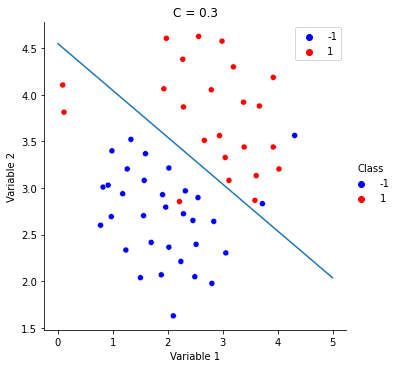

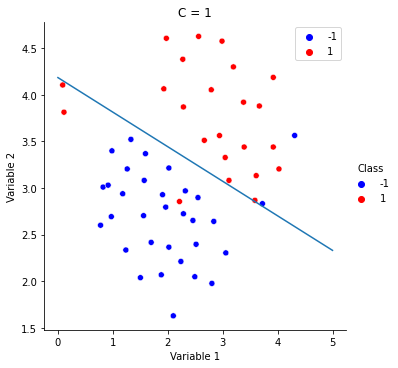

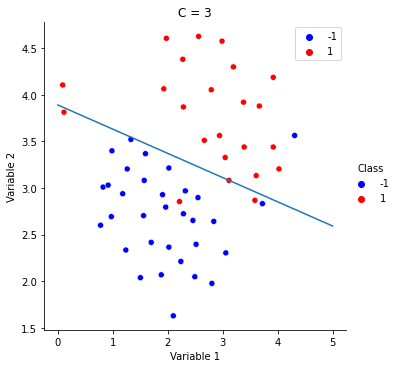

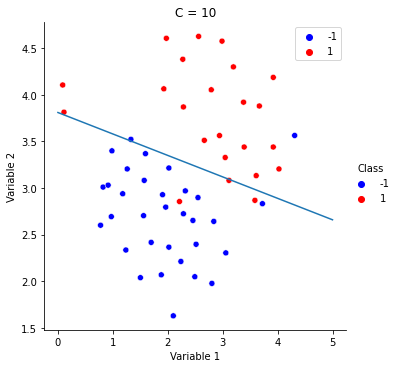

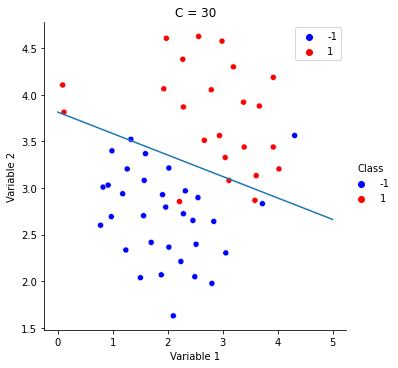

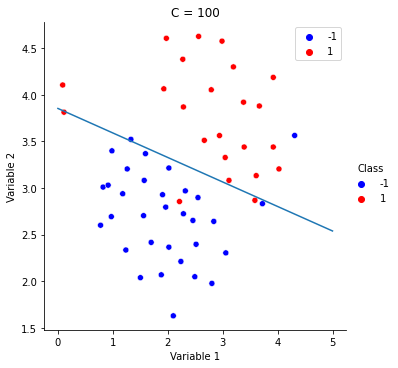

In [22]:
c_values = [0.01,0.03,0.1,0.3,1,3,10,30,100]
ss = ["0.01","0.03","0.1","0.3","1","3","10","30","100"]
for i in range(len(c_values)):
  clfa = svm.SVC(kernel='linear',C=c_values[i])
  x = c_values[i]
  clfa.fit(x_d2,class_d2)
  clfa_w = clfa.coef_[0]
  clfa_b = clfa.intercept_[0]
  clfa_x = np.linspace(0,5,100)
  clfa_y = -((clfa_w[0]/clfa_w[1])*clfa_x + clfa_b/clfa_w[1])
  sns.relplot(x = var1_d2,y = var2_d2,hue = class_d2,palette=["b", "r"])
  sns.lineplot(x = clfa_x, y = clfa_y,palette = 'g')
  plt.title("C = " + ss[i])  